In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from NeuronModel import NeuronModel
import cmasher
from manim import *
import os
from matplotlib.animation import FuncAnimation
from tqdm.notebook import tqdm

# Cofiguring manim
config.frame_width = 8
config.frame_height = 8
config.pixel_width = 3000
config.pixel_height = 3000

In [2]:
neuron = NeuronModel(bifurcation_type='saddle-node')

In [6]:
class WaterLandscapeScene(Scene):

    @staticmethod
    def get_streamlines(ax, vector_field, resolution=20):
        ''' Create StreamLines object from vector field function '''
        x_range = [ax.c2p(ax.x_range[0], 0)[0], ax.c2p(ax.x_range[1], 0)[0]]
        y_range = [ax.c2p(0, ax.y_range[0])[1], ax.c2p(0, ax.y_range[1])[1]]
        x_step = (x_range[1] - x_range[0]) / resolution
        y_step = (y_range[1] - y_range[0]) / resolution

        stream_lines = StreamLines(
            vector_field,
            x_range=[x_range[0], x_range[1], x_step],
            y_range=[y_range[0], y_range[1], y_step],
            colors=["#34cceb", "#2a58ad"],
            virtual_time=5,
            stroke_width=1.5,
            max_anchors_per_line=10
        )
        return stream_lines
    

    def construct(self):
        self.camera.frame_width = 8
        self.camera.frame_height = 8
        
        # Create axes
        ax = Axes(
            x_range=[-90, 20, 10],
            y_range=[0, 1, 0.1],
            x_length=7,
            y_length=7,
            axis_config={"color": WHITE},
        )
        ax.center()


                
        I_ext = 0


        # Make vector_field a function of the current
        def vector_field(pos):
            V, n = ax.p2c(pos)[:2]
            dVdt, dndt = neuron.dALLdt([V, n], 0, lambda t: I_ext)
            dV_manim = ax.c2p(V + dVdt, n)[0] - ax.c2p(V, n)[0]
            dn_manim = ax.c2p(V, n + dndt)[1] - ax.c2p(V, n)[1]
            return np.array([dV_manim, dn_manim, 0]) * 0.1
        

        # stream_lines = self.get_streamlines(ax, vector_field)
        # self.add(stream_lines)
        self.add(ax)
       # stream_lines.start_animation(warm_up=False, flow_speed=1)

        # Animate the current
       # self.wait(stream_lines.virtual_time / stream_lines.flow_speed)

Manim Community v0.18.1

[11/28/24 17:26:36] INFO                                                                   ]8;id=389056;file:///Users/artemkirsanov/venvs/animation/lib/python3.12/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=522553;file:///Users/artemkirsanov/venvs/animation/lib/python3.12/site-packages/manim/scene/scene_file_writer.py#737\737]8;;\
                             File ready at                                                                         
                             '/Users/artemkirsanov/YouTube/Bifurcations/code/media/images/                         
                             code/WaterLandscapeScene_ManimCE_v0.18.1.png'                                         
                                                                                                                   

                    INFO     Rendered WaterLandscapeScene                                              ]8;id=600245;file:///Users/artemkirsanov/venvs/animation/lib/python3.12/site-packages/manim/scene/scene.py\scene.py]8;;\:]8;id=142046;file:///Users/artemkirsanov/venvs/animation/lib/python3.12/site-packages/manim/scene/scene.py#247\247]8;;\
                             Played 0 animations                                                                   

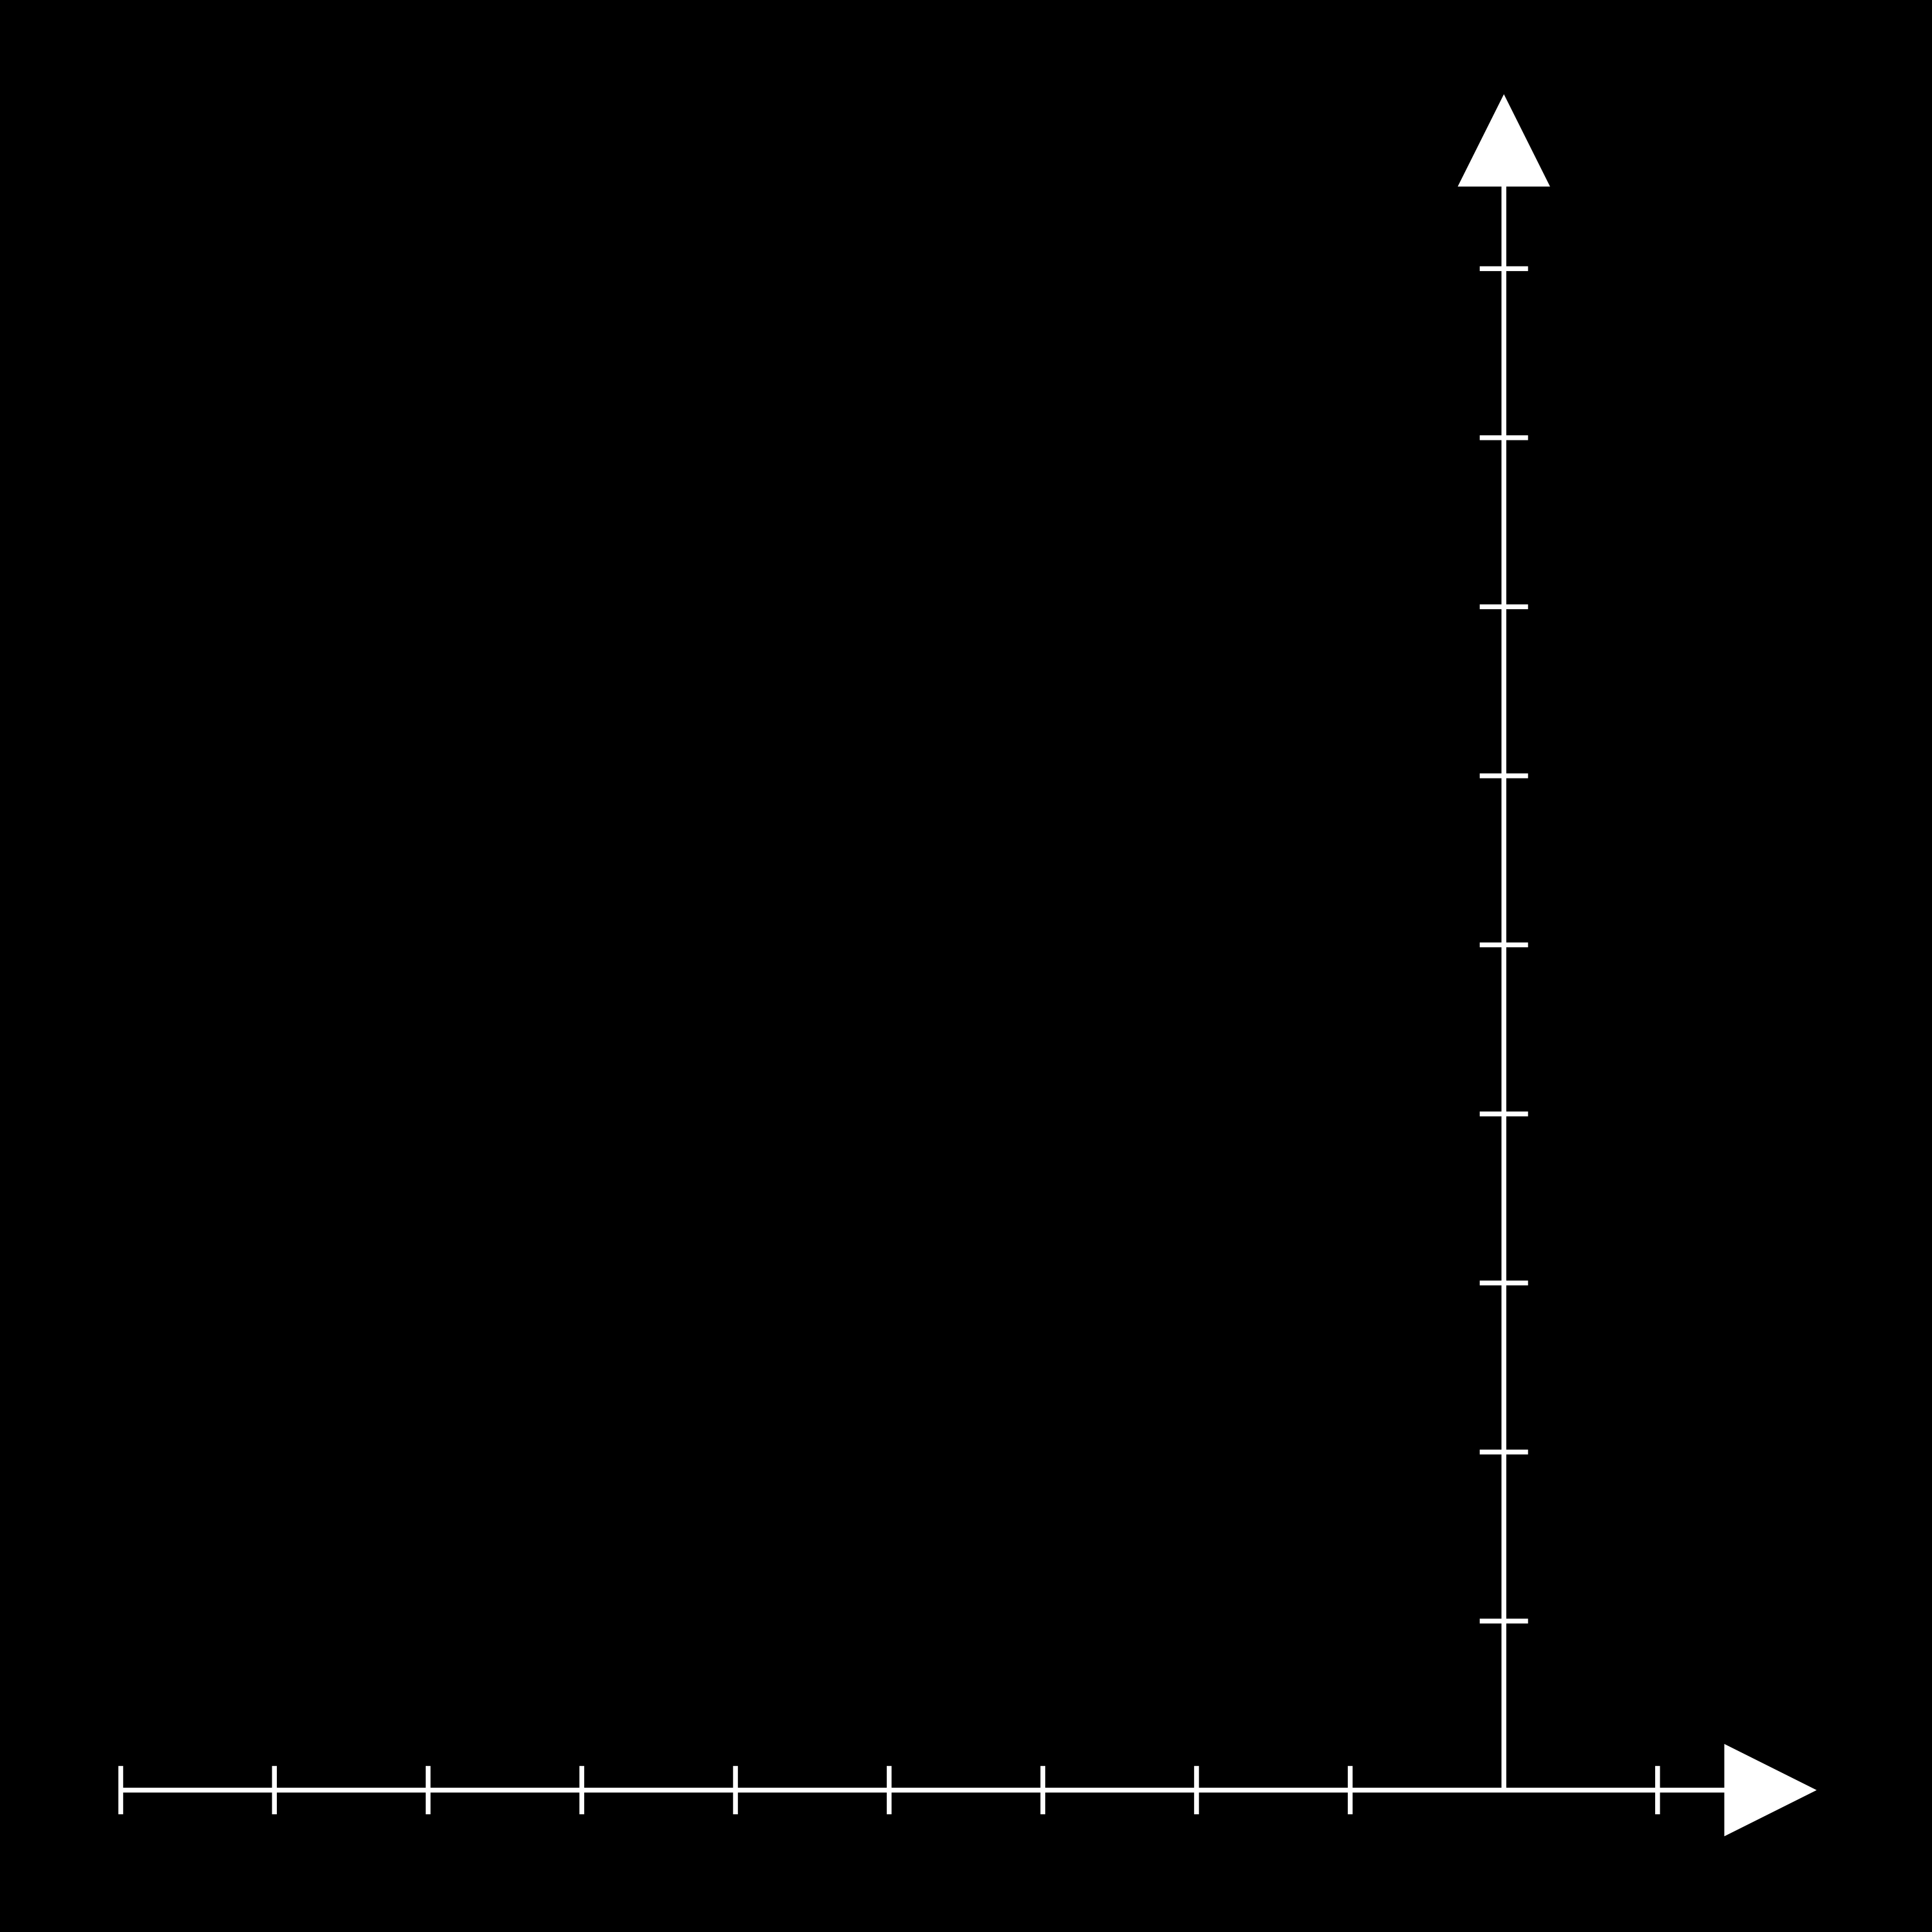

In [7]:
%manim WaterLandscapeScene